# 의사결정나무_분류

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [94]:
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams['font.family']='NanumGothic'

## 데이터 구성하기

In [95]:
df_raw=pd.read_csv("/home/piai/Big Data/2. Big Data 분석/유방암.csv", encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### 데이터 개수 확인

In [11]:
df_raw.shape

(320, 31)

변수 : 31개, 자료수 320개 

### 데이터 타입 확인

In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

목표변수 diagnosis는 범주형 변수이므로 object type
그 외로는 모두 연속형 변수이므로 float64 type 확인

### 결측치 처리

In [8]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

결측치 없음. 그대로 진행

### 기술 통계량 확인

In [10]:
df_raw.describe().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,...,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,15.710,20.323,103.050,807.736,0.099,0.123,0.122,0.067,0.187,0.063,...,18.542,27.226,123.222,1133.463,0.138,0.309,0.353,0.145,0.305,0.087
std,3.746,4.151,25.836,391.969,0.014,0.057,0.085,0.042,0.027,0.007,...,5.182,6.050,35.960,640.980,0.023,0.175,0.214,0.067,0.069,0.020
min,7.691,9.710,47.920,170.400,0.053,0.027,0.000,0.000,0.127,0.050,...,8.678,12.020,54.490,223.600,0.086,0.050,0.000,0.000,0.156,0.055
25%,13.050,17.460,84.845,523.900,0.090,0.081,0.053,0.030,0.167,0.057,...,14.657,23.275,95.525,653.525,0.123,0.180,0.183,0.091,0.259,0.073
50%,15.125,20.215,100.100,713.050,0.099,0.115,0.111,0.065,0.185,0.061,...,17.730,26.880,118.850,969.200,0.138,0.277,0.340,0.153,0.296,0.083
75%,18.520,22.500,121.550,1075.250,0.108,0.156,0.170,0.092,0.203,0.067,...,22.420,30.938,148.850,1538.500,0.151,0.406,0.484,0.197,0.328,0.098
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.170,0.291,0.664,0.208


### 목표변수(diagnosis), 설명변수 데이터 구성

In [97]:
# 설명변수
df_raw_x=df_raw.drop('diagnosis', axis=1) 
# 목표변수 (diagnosis)
df_raw_y=df_raw['diagnosis']

In [14]:
df_raw_y.head()

0    음성
1    양성
2    음성
3    양성
4    양성
Name: diagnosis, dtype: object

In [15]:
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### 데이터 분할 train(0.6) : test(0.4)

In [16]:
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.4)
print("train data : ", df_train_x.shape)
print("test data : ", df_test_x.shape)

train data :  (192, 30)
test data :  (128, 30)


train data 총 192개, test data 총 128개로 구성됨

### 목표변수 확인

In [65]:
df_raw_y.value_counts()

음성    212
양성    108
Name: diagnosis, dtype: int64

 목표변수 전체에서 음성은 212개, 양성은 108개로 확인

In [63]:
df_test_y.value_counts()

음성    80
양성    48
Name: diagnosis, dtype: int64

목표변수 test data 중 음성은 80개, 양성은 48개 결과 확인

## 의사결정나무 모델 생성

### 기본 옵션으로 모델 생성

In [56]:
tree_uncustomized=DecisionTreeClassifier()
tree_uncustomized.fit(df_train_x, df_train_y)

DecisionTreeClassifier()

In [30]:
print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.867


기본 옵션으로 의사결정나무 모델 생성시, 모델 정확도는 train 100%, test 86.7%로 모델은 train data에 과대적합

## 모델 Parameter 조정

### max_depth : 최대 깊이 변경에 따른 모델 생성

In [32]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# max_depth 최대 깊이 변경. 1~10
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth :
    tree=DecisionTreeClassifier(max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['Train Accuracy']=train_accuracy
df_accuracy_depth['Test Accuracy']=test_accuracy

In [33]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,Train Accuracy,Test Accuracy
0,1,0.911,0.898
1,2,0.958,0.883
2,3,0.984,0.852
3,4,0.995,0.875
4,5,1.000,0.906
5,6,1.000,0.898
6,7,1.000,0.891
7,8,1.000,0.898
8,9,1.000,0.906
9,10,1.000,0.852


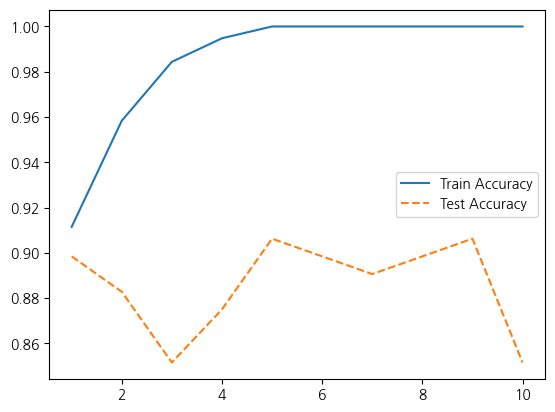

In [34]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

test data의 정확성을 높이기 위해서 max_depth로 5 또는 9가 적당함.

하지만 9로 설정했을 때 과대적합이 될 위험성이 더 커지기 때문에 max_depth는 5로 설정

### min_samples_split : 분리 노드의 최소 자료수 변경에 따른 모델 생성

In [38]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# min_samples_split : 분할하기 위한 노드의 최소 샘플 수. 10~100
para_split=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    tree=DecisionTreeClassifier(min_samples_split=v_min_samples_split, max_depth=5)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_split=pd.DataFrame()
df_accuracy_split['MinSamplesSplit']=para_split
df_accuracy_split['Train Accuracy']=train_accuracy
df_accuracy_split['Test Accuracy']=test_accuracy

In [39]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,Train Accuracy,Test Accuracy
0,10,0.974,0.867
1,20,0.974,0.867
2,30,0.974,0.859
3,40,0.974,0.867
4,50,0.974,0.867
5,60,0.958,0.875
6,70,0.927,0.859
7,80,0.927,0.859
8,90,0.927,0.859
9,100,0.927,0.859


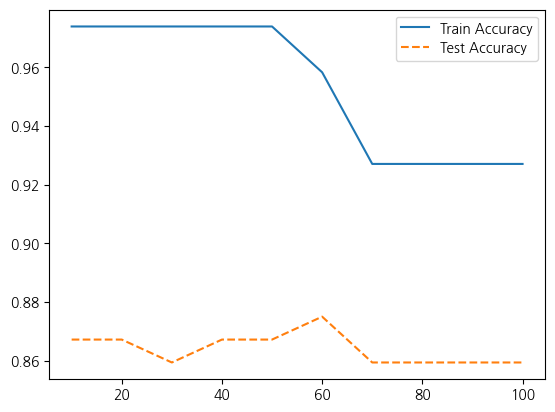

In [40]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

train data는 총 192개. 
test data는 60 이후로 성능이 저하되며 train data는 50 이후로 성능이 저하됨.
train data의 총 개수가 192개 임을 감안하여 과대적합을 방지하기 위해 min_samples_split는 50개로 설정

### min_samples_leaf : 잎사귀 노드의 최소 자료수 변경에 따른 모델 생성

In [44]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# min_samples_leaf : 잎사귀 노드 최소 자료 수. 2~20
para_leaf=[n_leaf*2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf :
    tree=DecisionTreeClassifier(min_samples_leaf=v_min_samples_leaf, min_samples_split=50, max_depth=5)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf']=para_leaf
df_accuracy_leaf['Train Accuracy']=train_accuracy
df_accuracy_leaf['Test Accuracy']=test_accuracy

In [45]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Train Accuracy,Test Accuracy
0,2,0.969,0.852
1,4,0.964,0.891
2,6,0.958,0.883
3,8,0.953,0.883
4,10,0.938,0.891
5,12,0.932,0.898
6,14,0.922,0.898
7,16,0.922,0.898
8,18,0.911,0.898
9,20,0.911,0.898


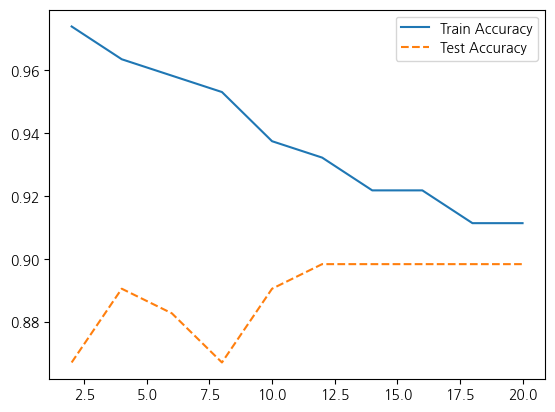

In [43]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

train data는 총 192개. 
test data는 값이 증가할수록 모델의 정확도가 감소한다.
train data의 총 개수가 192개 임을 감안하여 min_samples_leaf는 12개로 설정

## 최종 모델

In [55]:
tree_final=DecisionTreeClassifier(max_depth=5, min_samples_split=50, min_samples_leaf=12)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=12, min_samples_split=50)

### 최종 모델 성능 평가

In [49]:
# 모델 정확도
print("Train Data Accuracy :", tree_final.score(df_train_x, df_train_y).round(3))
print("Test Data Accuracy :", tree_final.score(df_test_x, df_test_y).round(3))

Train Data Accuracy : 0.932
Test Data Accuracy : 0.898


최종 모델은 train data에서 93.2%의 정확도를 보이며, test data에서는 89.8%의 정확도를 보인다. 따라서 train data의 성능은 조금 감소하였지만 test data의 성능을 향상시키며 과대적합 문제를 해결하였다.

### 최종 모델을 이용한 분류 예측

In [54]:
# 목표범수 예측
y_pred=tree_final.predict(df_test_x)

# Confusion matrix
print("Confusion Matrix :\n{}".format(confusion_matrix(df_test_y, y_pred)))

Confusion Matrix :
[[42  6]
 [ 7 73]]


[Confusion Matrix]
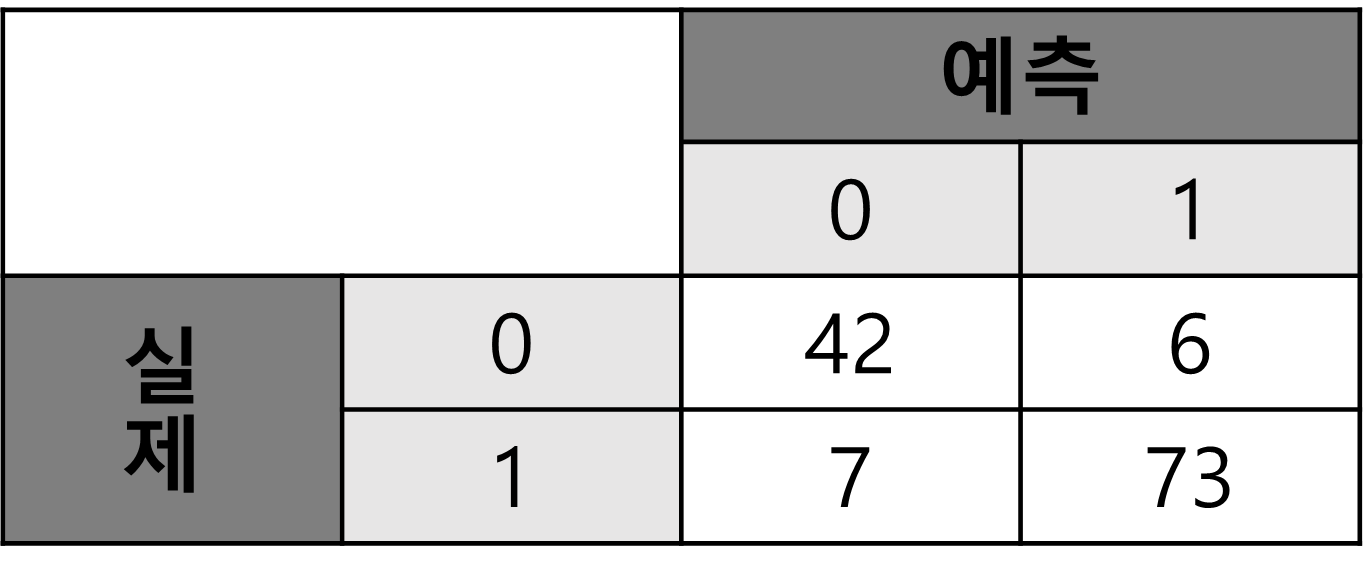

이 때, 0은 양성 data, 1은 음성 data를 의미함

### 최종 모델 시각화

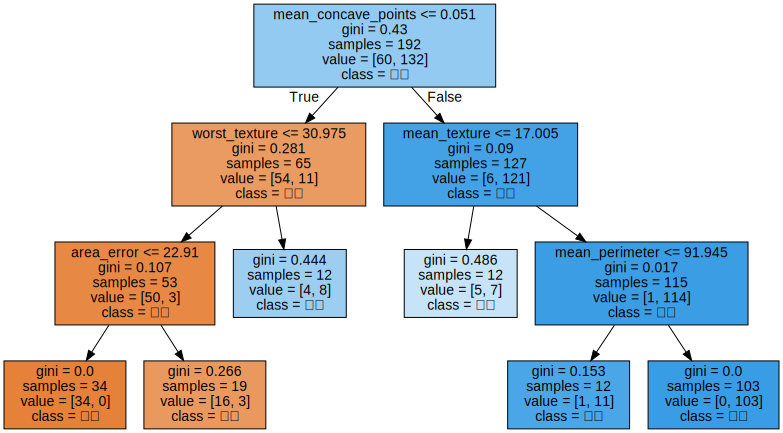

In [73]:
v_feature_name=df_train_x.columns
export_graphviz(tree_final, out_file='tree_final.dot',class_names=['양성', '음성'], feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_final.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### 설명변수 중요도

In [89]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

# 설명변수 중요도 테이블 출력
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance[:8].round(3)

,Feature,Importance
7,mean_concave_points,0.819
21,worst_texture,0.113
1,mean_texture,0.056
13,area_error,0.009
2,mean_perimeter,0.002
0,mean_radius,0.000
22,worst_perimeter,0.000
19,fractal_dimension_error,0.000


이외 변수들은 영향이 너무 미미하므로 출력하지 않음.

최종 모델 확인 결과, 유방암 데이터 세트에서 음성/양성을 판단함에 있어서 mean_concave_points가 결정적인 변수로 작용한다는 것을 알 수 있다.
mean_concave_points는 오목한 포인트의 개수를 의미하는 것으로 mean_concave_point가 0.051보다 크다면 음성으로 판단될 확률이 높다.
만약 mean_concave_point가 0.051보다 작았을 때는 worst_texture가 대략 31이상일 때를 제외하고는 높은 확률로 양성으로 판단된다는 것을 확인할 수 있다. 
confusion matrix에서 양성을 음성으로 판단하는 경우와 음성을 양성으로 판단하는 경우는 매우 치명적이며 이 경우가 대략 10% 내외인 것으로 보아 더 많은 데이터 확보 후 모델 개선이 필요해보인다. 

# 랜덤 포레스트_분류

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [91]:
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams['font.family']='NanumGothic'

## 데이터 구성하기

In [92]:
df_raw=pd.read_csv("/home/piai/Big Data/2. Big Data 분석/유방암.csv", encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


이 외 결측치 확인 및 기술통계량 확인 등은 위의 과정에서 진행했으므로 생략

### 목표변수(diagnosis), 설명변수 데이터 구성

In [96]:
# 설명변수
df_raw_x=df_raw.drop('diagnosis', axis=1) 
# 목표변수 (diagnosis)
df_raw_y=df_raw['diagnosis']

### 데이터 분할 train(0.6) : test(0.4)

In [98]:
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.4)
print("train data : ", df_train_x.shape)
print("test data : ", df_test_x.shape)

train data :  (192, 30)
test data :  (128, 30)


train data 총 192개, test data 총 128개로 구성됨

위에서,
목표변수 전체에서 음성은 212개, 양성은 108개로 확인

목표변수 test data 중 음성은 80개, 양성은 48개 결과 확인

## 랜덤 포레스트 모델 생성

### 기본 옵션으로 모델 생성

In [99]:
rf_uncustomized=RandomForestClassifier()
rf_uncustomized.fit(df_train_x, df_train_y)

RandomForestClassifier()

In [100]:
print("Accuracy on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.945


기본 옵션으로 의사결정나무 모델 생성시, 모델 정확도는 train 100%, test 86.7%로 모델은 train data에 과대적합

## 모델 Parameter 조정

### n_estimators : 트리 수 변경에 따른 모델 성능

In [101]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# n_estimators : 트리 수 변경 1~150
para_n_tree=[n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree :
    rf=RandomForestClassifier(n_estimators=v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_n=pd.DataFrame()
df_accuracy_n['n_estimators']=para_n_tree
df_accuracy_n['Train Accuracy']=train_accuracy
df_accuracy_n['Test Accuracy']=test_accuracy

In [102]:
# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,Train Accuracy,Test Accuracy
0,10,0.995,0.945
1,20,1.000,0.938
2,30,1.000,0.938
3,40,1.000,0.961
4,50,1.000,0.938
5,60,1.000,0.930
6,70,1.000,0.938
7,80,1.000,0.953
8,90,1.000,0.938
9,100,1.000,0.938


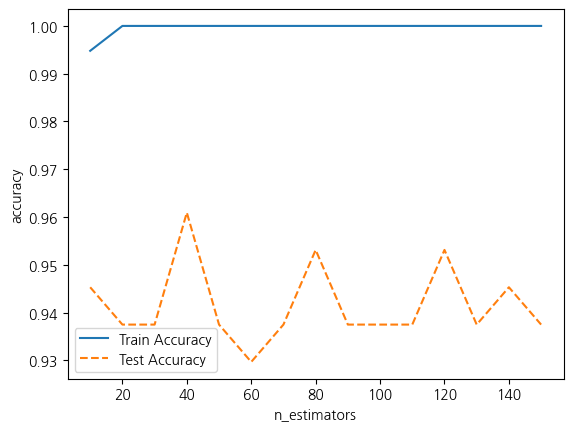

In [103]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('n_estimators'); plt.ylabel('accuracy')
plt.legend()

train data의 경우 결정 트리수가 20개 이상일 때부터 100%를 달성하기 때문에 과적합 경향을 보임.

하지만 결정 트리수를 20개 이하로 설정하면 test data의 정확도가 낮기 때문에 test data가 최대 성능을 보이는 40으로 최종 결정

### max_depth : 최대 깊이 변경에 따른 모델 생성

In [104]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# max_depth : 최대 깊이 변경. 1~10
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth :
    rf=RandomForestClassifier(max_depth=v_max_depth, n_estimators=40)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['Train Accuracy']=train_accuracy
df_accuracy_depth['Test Accuracy']=test_accuracy

In [105]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,Train Accuracy,Test Accuracy
0,1,0.938,0.914
1,2,0.953,0.922
2,3,0.984,0.930
3,4,1.000,0.953
4,5,0.995,0.938
5,6,1.000,0.938
6,7,1.000,0.945
7,8,1.000,0.945
8,9,1.000,0.945
9,10,1.000,0.938


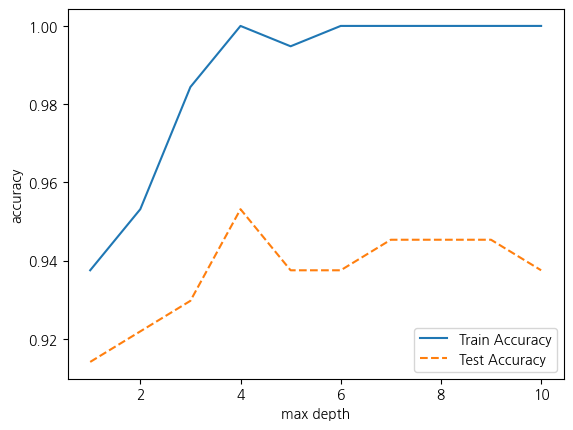

In [106]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('max depth'); plt.ylabel('accuracy')
plt.legend()

최대 깊이 증가함에 따라 train data는 과적합 경향을 보임. 과적합을 최대한 방지하고 test data의 성능을 향상시키기 위해 max_depth는 4로 설정

### min_samples_split : 분리 노드의 최소 자료수 변경에 따른 모델 성능

In [110]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# min_samples_split : 분할하기 위한 노드의 최소 샘플 수. 10~100
para_split=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    rf=RandomForestClassifier(min_samples_split=v_min_samples_split, max_depth=4, n_estimators=40)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_split=pd.DataFrame()
df_accuracy_split['MinSamplesSpilt']=para_split
df_accuracy_split['Train Accuracy']=train_accuracy
df_accuracy_split['Test Accuracy']=test_accuracy

In [111]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSpilt,Train Accuracy,Test Accuracy
0,10,0.990,0.922
1,20,0.984,0.914
2,30,0.979,0.938
3,40,0.974,0.922
4,50,0.958,0.898
5,60,0.969,0.898
6,70,0.943,0.883
7,80,0.943,0.906
8,90,0.938,0.906
9,100,0.943,0.914


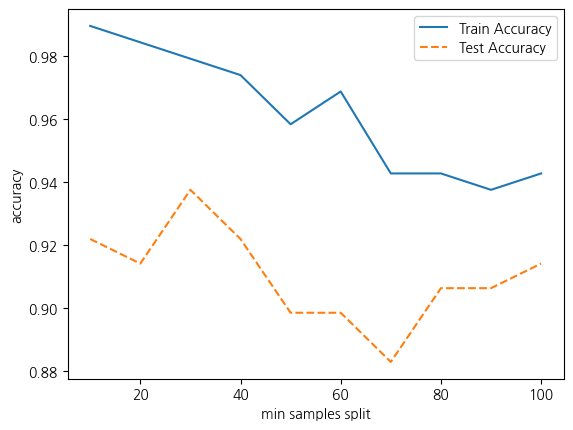

In [113]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('min samples split'); plt.ylabel('accuracy')
plt.legend()

train data는 총 192개. 
test data는 30 이후로 성능이 저하되며 train data는 정확도가 지속적으로 감소하는 추세를 보임.
train data의 총 개수가 192개 임을 감안하여 과대적합을 방지하기 위해 min_samples_split는 40개로 설정

### min_samples_leaf : 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능

In [132]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# min_samples_leaf : 잎사귀 노드 최소 자료 수 5~50
para_leaf=[n_leaf*5 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf :
    rf=RandomForestClassifier(min_samples_leaf=v_min_samples_leaf, min_samples_split=40, max_depth=4, n_estimators=40)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf']=para_leaf
df_accuracy_leaf['Train Accuracy']=train_accuracy
df_accuracy_leaf['Test Accuracy']=test_accuracy

In [133]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Train Accuracy,Test Accuracy
0,5,0.953,0.898
1,10,0.958,0.930
2,15,0.958,0.922
3,20,0.943,0.922
4,25,0.948,0.891
5,30,0.948,0.898
6,35,0.938,0.906
7,40,0.958,0.930
8,45,0.953,0.930
9,50,0.932,0.922


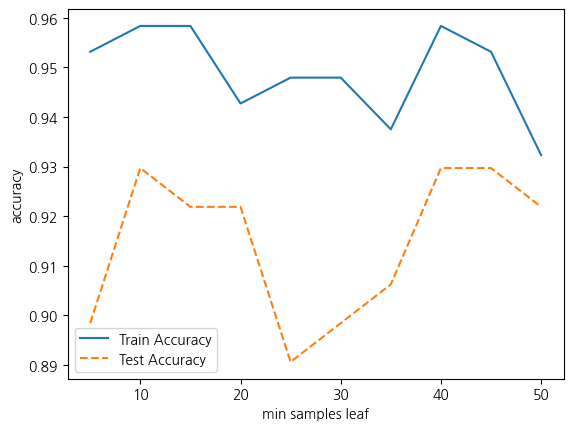

In [134]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('min samples leaf'); plt.ylabel('accuracy')
plt.legend()

train data는 총 192개. 
잎사귀 노드의 최소 자료수가 증가하면서 train data의 성능은 전반적으로 감소하는 추세를 보이며 test data는 불규칙적인 모습을 보임
min_samples_split는 과대적합을 최대한 방지하기 위해 35개로 설정

## 최종 모델

In [137]:
rf_final=RandomForestClassifier(min_samples_leaf=35, min_samples_split=40, max_depth=4, n_estimators=40)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=4, min_samples_leaf=35, min_samples_split=40,
                       n_estimators=40)

### 최종 모델 성능 평가

In [138]:
# 모델 정확도
print("Train Data Accuracy :", rf_final.score(df_train_x, df_train_y).round(3))
print("Test Data Accuracy :", rf_final.score(df_test_x, df_test_y).round(3))

Train Data Accuracy : 0.958
Test Data Accuracy : 0.922


최종 모델은 train data에서 95.8%의 정확도를 보이며, test data에서는 92.2%의 정확도를 보인다. 따라서 성능은 조금 감소하였지만 train data와 test data간 accuracy 차이가 약 3.5%에 불과해 과대적합 문제를 해결하였다.

### 최종 모델을 이용한 분류 예측

In [139]:
# 목표범수 예측
y_pred=rf_final.predict(df_test_x)

# Confusion matrix
print("Confusion Matrix :\n{}".format(confusion_matrix(df_test_y, y_pred)))

Confusion Matrix :
[[38  8]
 [ 2 80]]


[Confusion Matrix]
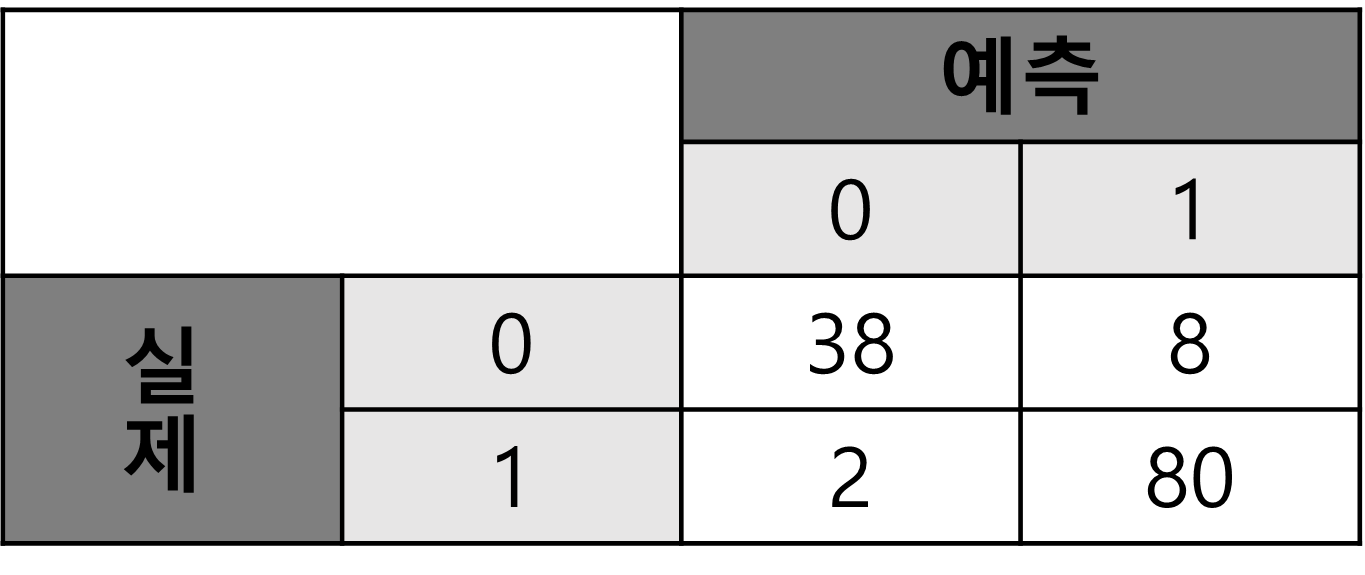

이 때, 0은 양성 data, 1은 음성 data를 의미함

### 설명변수 중요도

In [141]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

# 설명변수 중요도 테이블 출력
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance[:15].round(3)

,Feature,Importance
27,worst_concave_points,0.173
20,worst_radius,0.149
23,worst_area,0.129
6,mean_concavity,0.125
22,worst_perimeter,0.100
7,mean_concave_points,0.075
5,mean_compactness,0.051
2,mean_perimeter,0.050
10,radius_error,0.027
13,area_error,0.026


이외 변수들은 영향이 너무 미미하므로 출력하지 않음.

최종 모델 확인 결과, 유방암 데이터 세트에서 음성/양성을 판단함에 있어서 mean_concave_points, worst_radius, worst_area, mean_concavity, worst_perimeter 5가지 변수가 주요 영향을 미친다는 것을 알 수 있다. 따라서 전반적으로 종양의 형상과 오목한 점의 개수와 오목한 정도가 중요한 것으로 보인다. 

랜덤 포레스트를 활용하여 결과를 분류하였기 때문에 트리 구조 확인은 어려우나,
confusion matrix에서 양성을 음성으로 판단하는 경우와 음성을 양성으로 판단하는 경우는 매우 치명적이며 이 경우가 대략 7.8%인 것으로 보아 더 많은 데이터 확보 후 모델 개선이 필요해보인다. 하지만 의사결정나무 하나만을 이용해서 결과를 분류했을 때 보다는 더 높은 효율을 보였다.  